# Clustering  : cas pratique 

Le but de ce cas pratique est de réviser l'ensemble des algorithmes que nous avons vu ensemble dernièrement.  

## Les données 
Les données auxquelles nous nous intéressons sont celles de l'absentéisme dans une entreprise brésilienne. Les données sont dans le fichier csv `Absenteeism_at_work.csv` et leur description dans le fichier word `Attribute information`.   

## Première analyse en CAH  
Nous nous intéressons tout d'abord à essayer de regrouper les raisons de l'absence en moins de catégories qu'actuellement. Pour cela, nous allons mener une classification ascendante hiérarchique sur les variables explicatives de raisons de l'absence que nous avons à disposition. Nous allons utiliser l'ensemble des variables à notre disposition __sauf l'absentéisme en heures et les raisons de l'absence__.  

- Importez les données. Dans une nouvelle table stockez les variables qui nous intéressent et transformez les variables catégoriques en `dummies`.  


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

#pd.set_option('display.max_columns',100)
pd.options.display.max_columns = 40

In [20]:
#import des données
df0 = pd.read_csv('Absenteeism_at_work_AAA/Absenteeism_at_work.csv', sep=';')
df0.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [21]:
# suppression des doublons
df0.drop_duplicates(inplace=True)

In [47]:
# on garde les variables qui nous intéressent
df = df0.drop(['ID', 'Reason for absence', 'Month of absence', 'Day of the week', 'Absenteeism time in hours'], axis=1)
df.head()

,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30
1,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31
2,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31
3,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24
4,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30


In [48]:
# création des dummies
df = pd.get_dummies(df, columns=['Seasons', 'Education'])
df.head()

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Seasons_1,Seasons_2,Seasons_3,Seasons_4,Education_1,Education_2,Education_3,Education_4
0,289,36,13,33,239.554,97,0,2,1,0,1,90,172,30,1,0,0,0,1,0,0,0
1,118,13,18,50,239.554,97,1,1,1,0,0,98,178,31,1,0,0,0,1,0,0,0
2,179,51,18,38,239.554,97,0,0,1,0,0,89,170,31,1,0,0,0,1,0,0,0
3,279,5,14,39,239.554,97,0,2,1,1,0,68,168,24,1,0,0,0,1,0,0,0
4,289,36,13,33,239.554,97,0,2,1,0,1,90,172,30,1,0,0,0,1,0,0,0


- Mettez l'ensemble des variables à la même échelle avec le `MinMaxScaler` de scikit learn, qui permet de mettre les variables continues à la même échelle que les `dummies`.

In [49]:
# MinMaxscaler ne modifie pas les dummies et permet de mettre les
# variables continues à la même échelle entre 0 et 1
sc = MinMaxScaler()
df = sc.fit_transform(df)

 
- Affichez le dendogramme d'une analyse CAH et justifiez un choix de nombre de classes.  


In [50]:
# On fait d'abord la matrice de liens : 
mat_lien = linkage(df, method='ward', metric='euclidean')
mat_lien

array([[   0.        ,    4.        ,    0.        ,    2.        ],
       [ 254.        ,  257.        ,    0.        ,    2.        ],
       [ 227.        ,  233.        ,    0.        ,    2.        ],
       ...,
       [1402.        , 1407.        ,   17.19989737,  423.        ],
       [1405.        , 1408.        ,   17.88270277,  586.        ],
       [1406.        , 1409.        ,   20.48204367,  706.        ]])

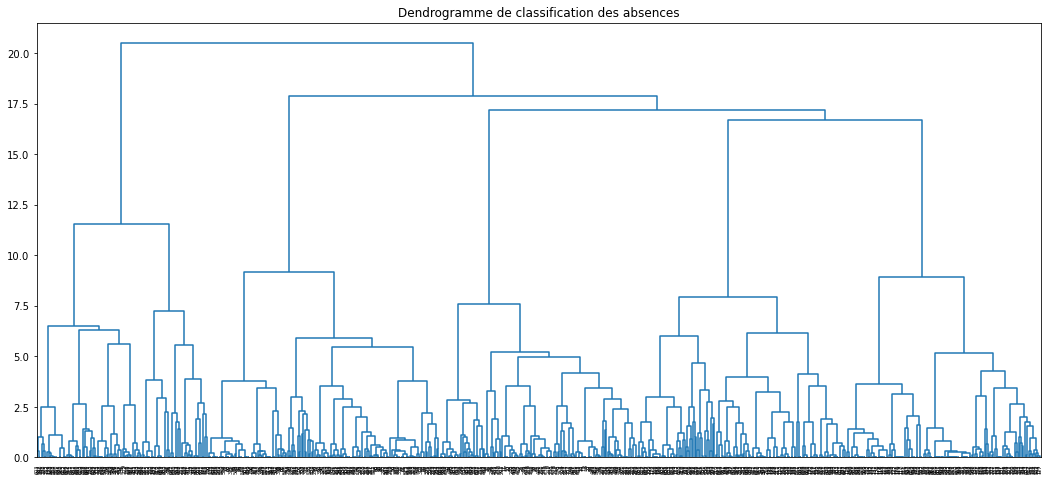

In [51]:
# Puis on peut afficher notre dendogramme : 
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(1,1,1)
ax.set_title("Dendrogramme de classification des absences")
dendrogram(mat_lien, orientation='top', color_threshold=0);

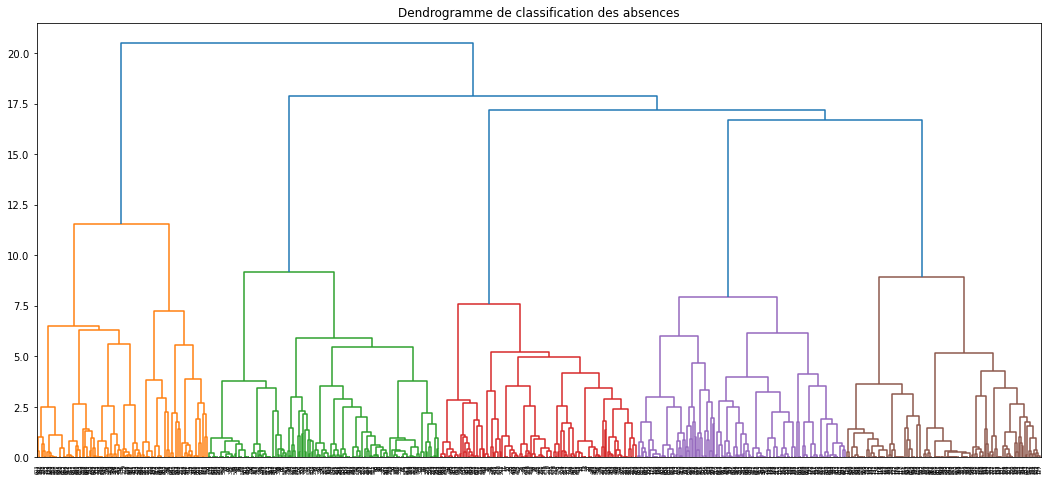

In [52]:
# On peut choisir 5 classes
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(1,1,1)
ax.set_title("Dendrogramme de classification des absences")
dendrogram(mat_lien, orientation='top', color_threshold=12.5);

- Procédez à la classification de vos données en fonction de ce nombre de classes.

In [53]:
# On crée les 5 classes
classes_cah = fcluster(mat_lien, t=12.5, criterion='distance')
np.unique(classes_cah, return_counts=True)

(array([1, 2, 3, 4, 5], dtype=int32), array([120, 163, 139, 147, 137]))

  - Affichez le tableau croisé des occurences des raisons pour l'absence et de vos classes obtenues. Y-a-t-il matière à faire un regroupement?

In [54]:
# on va regarder la répartition des motifs d'absences dans les classes
pd.crosstab(classes_cah, df0['Reason for absence'])

Reason for absence,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28
row_0,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4,7,1,0,0,0,1,3,2,0,4,6,3,14,1,0,3,1,7,4,4,7,19,0,13,4,11,1
2,19,1,0,0,2,0,2,3,1,1,7,3,2,9,7,1,0,0,1,4,1,6,49,2,1,9,1,31
3,6,3,0,0,0,2,3,1,2,3,1,6,0,6,3,1,0,0,6,8,1,8,34,1,8,10,0,26
4,12,1,0,0,0,1,1,4,1,0,9,8,2,16,6,0,0,0,2,15,0,10,18,0,1,4,3,33
5,2,4,0,1,0,0,1,4,0,0,4,3,1,10,2,0,0,0,5,9,0,6,22,0,8,6,32,17


## Réduction du nombre de dimensions du problème  : Analyse en Composantes Principales  

Nous allons maintenant tenter de mettre en oeuvre une ACP.  

- En affichant le graphique de l'évolution du ratio de la variance expliquée en fonction du nombre de composantes, justifiez du choix d'un nombre de composantes.  

In [73]:
#import des données
df0 = pd.read_csv('Absenteeism_at_work_AAA/Absenteeism_at_work.csv', sep=';')

# suppression des doublons
df0.drop_duplicates(inplace=True)

# on garde les variables qui nous intéressent
df = df0.drop(['ID', 'Reason for absence', 'Month of absence', 'Day of the week', 'Absenteeism time in hours'], axis=1)

# création des dummies
df = pd.get_dummies(df, columns=['Seasons', 'Education'])

# on commence par standardiser
df_std = StandardScaler().fit_transform(df)

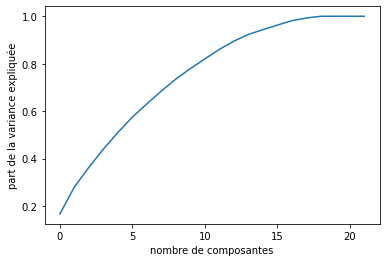

In [74]:
# graphique variance/nb de composantes
pca = PCA().fit(df_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('nombre de composantes')
plt.ylabel('part de la variance expliquée');

On voit qu'autour de 10 composantes, on expliqe environ 80% de la variance.

- Représentez graphiquement les points en fonction des deux premières composantes en colorant différemment selon la raison de l'absence. Trouve-t-on des regroupements qui coïncideraient avec les conclusions de la CAH?  Quel est le ratio de la variance expliqué par ces deux axes?  

La variance expliquée par les 2 premières composantes est 0.2808336668109521


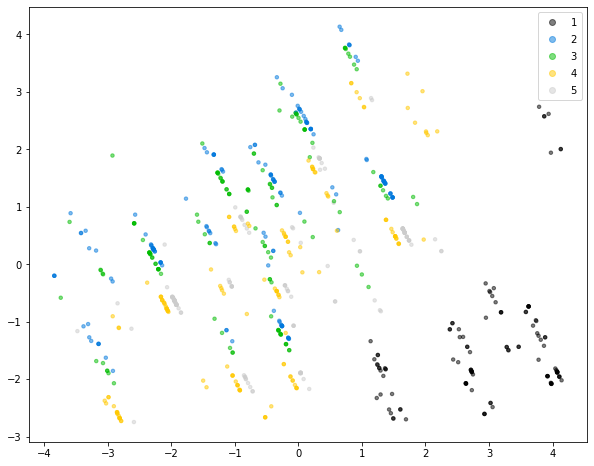

In [75]:
# on récupère la projection sur les composantes principales
X_pca = pca.transform(df_std)

# on trace les calasses obtenues par la CAH sur les 2 premières composantes
plt.figure(figsize=(10,8))
scat = plt.scatter(X_pca[:,0], X_pca[:,1],
                   c=classes_cah, cmap=plt.cm.get_cmap('nipy_spectral'),
                   alpha=0.5, s=12)
plt.legend(*scat.legend_elements());

# variance expliquée
print(f"La variance expliquée par les 2 premières composantes est {pca.explained_variance_ratio_[:2].sum()}")

## K-means et DBSCAN  
- Transformez les observations en fonction du nombre de composantes principales voulues en utilisant d'abord un algorithme de k-means puis un DBSCAN. 

- Comparez les résultats obtenus entre eux et avec la CAH.  

- Refaites ces classifications k-means et DBSCAN avec cette fois l'ensemble des variables explicatives à disposition. 

## Explication du temps d'absence   
On cherche maintenant à caractériser la longueur de l'absence, indépendemment de son motif.
- En reprenant l'analyse précédemment faite, regardez si le clustering peut aussi s'appliquer à la longueur de l'absence (absenteism in hours). Pour cela, regroupez cette variable en quelques classes que vous choisirez (pas d'absence - absence peu longue - absence longue - absence très longue). Pour déterminer les seuils qui discriminent le mieux les absences, vous pouvez utiliser une représentation graphique en fonction des deux premières composantes principales pour voir quelles nombres d'heures d'absence se trouvent aux mêmes endroits.
